In [9]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, noise=0, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=n_samples, random_state=seed, noise=noise)
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
twoMoons_noises = np.arange(0, 0.21, 0.01)
twoMoons_datasets = [
    [make_moons_random_assignment(500, noise=noise, seed=seed) for seed in random_seeds]
    for noise in twoMoons_noises
]

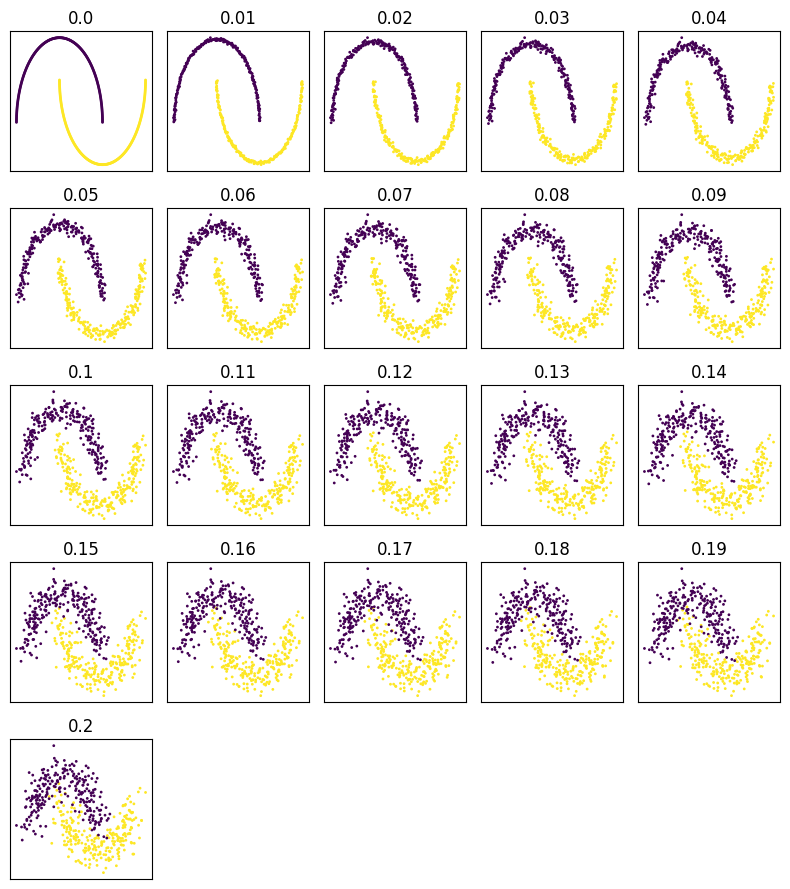

In [11]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(twoMoons_datasets, twoMoons_noises, n_cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_noise_data.png")

In [21]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df


eval_results = cache(
    "TwoMoons_noise",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, twoMoons_noises],
    recalc=False,
)

df = create_and_rescale_df(eval_results)

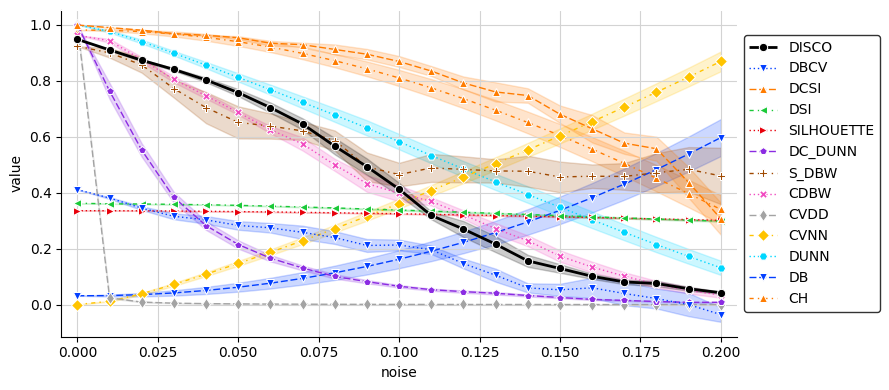

In [22]:
from src.utils.plots import plot_lineplot

eps = 0.005
x_range = twoMoons_noises[0] - eps, twoMoons_noises[-1] + eps
df = df.rename(columns={"dataset": "noise"})

plot_lineplot(df, "noise", "value", "measure", x_range=x_range, y_range=(None, None))
plt.savefig("imgs/TwoMoons_noise.png")

In [14]:
import pandas as pd
from src.utils.metrics import DISCO

from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets


min_points_list = range(1, 31, 2)

MIN_POINTS_DISCO = {
    min_points: lambda X, l, min_points=min_points: DISCO(X, l, min_points=min_points)
    for min_points in min_points_list
}

eval_results = cache(
    "TwoMoons_noise_DISCO_min_points",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, twoMoons_noises],
    {"metrics": MIN_POINTS_DISCO},
    recalc=False,
)

df = pd.DataFrame(data=eval_results)

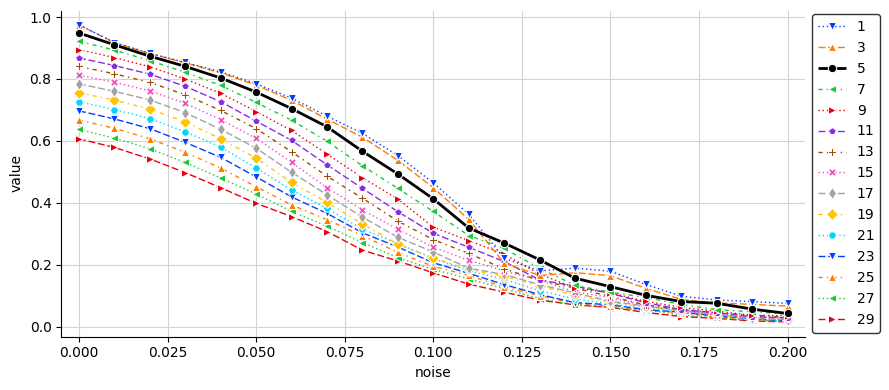

In [19]:
from src.utils.plots import plot_lineplot

eps = 0.005
x_range = twoMoons_noises[0] - eps, twoMoons_noises[-1] + eps
df = df.rename(columns={"dataset": "noise"})

plot_lineplot(df, "noise", "value", "measure", x_range=x_range, y_range=(None, None), highlight=3, errorbar=None)
plt.savefig("imgs/TwoMoons_noise_DISCO_min_points.png")